**KLASIFIKASI GUNTING, BATU, ATAU KERTAS**
=========================

### Import Library

In [ ]:
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import shutil
import zipfile
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Dataset

In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-27 16:39:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.50MB/s    in 59s     

2021-07-27 16:40:18 (5.23 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#Membaca dataset
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
os.listdir(base_dir)

['scissors', 'README_rpc-cv-images.txt', 'paper', 'rock']

In [ ]:
#Total dataset pada tiap tipe
print(len(os.listdir('/tmp/rockpaperscissors/rock')))
print(len(os.listdir('/tmp/rockpaperscissors/paper')))
print(len(os.listdir('/tmp/rockpaperscissors/scissors')))

726
712
750


### Augmentasi gambar dan data generator

In [ ]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=25,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    validation_split=0.4
)

In [ ]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=5,
    seed=42,
    subset="training"
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150,150),
    batch_size=5,
    seed=42,
    shuffle=False,
    subset="validation"
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


### Membuat model menggunakan Keras

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(nesterov=True),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

### Data training

In [ ]:
# Training model
model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=10,
    verbose=2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor="loss",
            patience=10,
            restore_best_weights=True,
        )
    ]
)

Epoch 1/25
100/100 - 35s - loss: 0.1338 - accuracy: 0.9640 - val_loss: 0.1878 - val_accuracy: 0.9000
Epoch 2/25
100/100 - 34s - loss: 0.0871 - accuracy: 0.9660 - val_loss: 0.1581 - val_accuracy: 0.9200
Epoch 3/25
100/100 - 34s - loss: 0.0969 - accuracy: 0.9720 - val_loss: 0.2334 - val_accuracy: 0.9000
Epoch 4/25
100/100 - 34s - loss: 0.0826 - accuracy: 0.9820 - val_loss: 0.1341 - val_accuracy: 0.9400
Epoch 5/25
100/100 - 34s - loss: 0.0583 - accuracy: 0.9800 - val_loss: 0.1559 - val_accuracy: 0.9400
Epoch 6/25
100/100 - 34s - loss: 0.0685 - accuracy: 0.9800 - val_loss: 0.3305 - val_accuracy: 0.9600
Epoch 7/25
100/100 - 34s - loss: 0.1036 - accuracy: 0.9660 - val_loss: 0.4099 - val_accuracy: 0.8800
Epoch 8/25
100/100 - 34s - loss: 0.1096 - accuracy: 0.9599 - val_loss: 0.1286 - val_accuracy: 0.9600
Epoch 9/25
100/100 - 34s - loss: 0.0494 - accuracy: 0.9860 - val_loss: 0.1200 - val_accuracy: 0.9400
Epoch 10/25
100/100 - 33s - loss: 0.0542 - accuracy: 0.9840 - val_loss: 0.1541 - val_accura

In [ ]:
# Testing model
model.evaluate(validation_generator)

175/175 [==============================] - 17s 97ms/step - loss: 0.0530 - accuracy: 0.9817


[0.05303281918168068, 0.9816933870315552]

### Melakukan uji gambar untuk pengklasifikasian

Saving d1.jpg to d1 (1).jpg
d1.jpg
paper


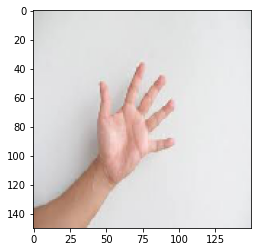

In [ ]:
uploaded = files.upload()

for name in uploaded.keys():
  img = image.load_img(name, target_size=(150,150))
  image_plot = plt.imshow(img)
  image_arr = image.img_to_array(img)
  image_arr = np.expand_dims(image_arr, axis=0)

  images = np.vstack([image_arr]) 
  pred = model.predict(images, batch_size = 10)

  print(name)
  if pred[0][0]==1:
    print("paper")
  elif pred[0][1]==1:
    print("rock")
  elif pred[0][2]==1:
    print("scissors")
  else:
    print("Not detected")